<a class="anchor" id="0.1"></a>
## Table of Content
***

0. [Step-00: Import Libraries](#0)

<!-- *** -->

1. [Step-01: Import Dataset](#1)
   - 1.1 [Data Overview](#1.1)
   - 1.2 [Missing Values](#1.2)
   - 1.3 [Numerical Features](#1.3)
   - 1.4 [Discrete Features](#1.4)
   - 1.5 [Continuous Features](#1.5)
   - 1.6 [Catagorical Features](#1.6)
   
<!-- *** -->

2. [Step-02: Data Engineering](#2)
   - 2.1 [Exploratory Data Analysis. (EDA)](#2.1)
     - 2.1.1 [Before Normalization with (Plotting)](#2.1.1)
     - 2.1.2 [Apply Yeo-Johnson transformation](#2.1.2)
     - 2.1.3 [After Normalization with (Plotting)](#2.1.3)
   - 2.2 [Data Wrangling](#2.2)
     - 2.2.1 [Features Scaling](#2.2.1)

<!-- *** -->

3. [Step-03: Data Cleaning or Organize](#3)
   - 3.1 [Remove Outliers](#3.1)

<!-- *** -->

4. [Step-04: Splitting (Training and Testing) Data](#4)

<!-- *** -->

5. [Step-05: Apply Techniques or Models](#5)
   - 5.1 [Linear Regression](#5.1)
   - 5.2 [Decision Tree Regressor](#5.2)
   - 5.3 [Random Forest Regressor](#5.3)
   - 5.4 [K_Nearest Neighbors](#5.4)
   - 5.5 [Support Vector Machine](#5.5)
   
<!-- *** -->

6. [Step-06: Evaluate or Compare Models Accuracy](#6)

<!-- *** -->

7. [Apply Cross-Validation](#7)

<!-- *** -->

8. [Best Technique](#8)


## <span style="color:orange">Techniques: <span style="color:yellow">**Support Vector Machine**</span>

### Problem:<span style="color:red"> **Regression**</span>

### Dataset: <span style="color:magenta">**Wind Speed Prediction !**</span>

***

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries) 

<a class="anchor" id="0"></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from math import sqrt


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

<a class="anchor" id="1"></a>

In [2]:
# import Dataset !

df = pd.read_csv('wind_speed.csv')
df.head(1)

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0


In [3]:
df.rename(columns = {'IND.1':'IND_1',
                     'T.MAX':'T_MAX',
                     'IND.2':'IND_2',
                     'T.MIN':'T_MIN',
                     'T.MIN.G':'T_MIN_G'}, inplace = True)

In [4]:
df = df.drop('DATE', axis=1)

In [5]:
df.sample(4)

,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
3941,17.00,0,5.3,0.0,14.2,0.0,10.3,5.1
4172,4.58,0,0.2,0.0,12.8,0.0,5.8,4.0
5117,21.59,0,0.2,0.0,11.2,0.0,7.0,5.8
3412,3.37,0,8.1,0.0,12.2,0.0,9.0,6.0


In [6]:
df.shape

(6574, 8)

In [7]:
df.isnull().sum()

WIND         0
IND          0
RAIN         0
IND_1       61
T_MAX      621
IND_2       61
T_MIN      674
T_MIN_G    360
dtype: int64

In [8]:
df['IND_1'] = df['IND_1'].replace(np.nan, df.IND_1.mean())
df['IND_1']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6569    0.0
6570    0.0
6571    0.0
6572    0.0
6573    0.0
Name: IND_1, Length: 6574, dtype: float64

In [9]:
df['T_MAX'] = df['T_MAX'].replace(np.nan, df.T_MAX.mean())
df['T_MAX']

0       9.5
1       7.2
2       5.5
3       5.6
4       7.2
       ... 
6569    9.8
6570    9.1
6571    5.0
6572    2.9
6573    1.2
Name: T_MAX, Length: 6574, dtype: float64

In [10]:
df['IND_2'] = df['IND_2'].replace(np.nan, df.IND_2.mean())
df['IND_2']

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
6569    0.0
6570    0.0
6571    0.0
6572    0.0
6573    1.0
Name: IND_2, Length: 6574, dtype: float64

In [11]:
df['T_MIN'] = df['T_MIN'].replace(np.nan, df.T_MIN.mean())
df['T_MIN']

0       3.7
1       4.2
2       0.5
3       0.4
4      -1.5
       ... 
6569    4.0
6570    8.5
6571    3.5
6572    0.3
6573   -1.5
Name: T_MIN, Length: 6574, dtype: float64

In [12]:
df['T_MIN_G'] = df['T_MIN_G'].replace(np.nan, df.T_MIN_G.mean())
df['T_MIN_G']

0      -1.0
1       1.1
2      -0.5
3      -3.2
4      -7.5
       ... 
6569    0.0
6570    8.0
6571    3.2
6572   -0.5
6573   -3.0
Name: T_MIN_G, Length: 6574, dtype: float64

In [13]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND_1      0
T_MAX      0
IND_2      0
T_MIN      0
T_MIN_G    0
dtype: int64

***

#### Data Overview

<a class="anchor" id="1.1"></a>


In [14]:
df.shape

(6574, 8)

In [15]:
df.nunique()

WIND       580
IND          3
RAIN       226
IND_1        5
T_MAX      247
IND_2        6
T_MIN      248
T_MIN_G    284
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND_1    6574 non-null   float64
 4   T_MAX    6574 non-null   float64
 5   IND_2    6574 non-null   float64
 6   T_MIN    6574 non-null   float64
 7   T_MIN_G  6574 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 411.0 KB


In [17]:
df.describe()

,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.123303,4.653792,1.172094,4.393061,5.414517
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,10.000000,0.000000,3.500000,-0.900000
50%,9.210000,0.000000,0.200000,0.000000,13.339123,0.000000,6.411678,2.736547
75%,12.960000,0.000000,2.000000,0.000000,16.800000,0.000000,9.600000,6.600000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [18]:
df.corr()

,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
WIND,1.000000,-0.038578,0.120876,0.070227,-0.230302,0.047666,-0.087851,0.012424
IND,-0.038578,1.000000,-0.148535,-0.028102,-0.072581,-0.015133,-0.048302,-0.062288
RAIN,0.120876,-0.148535,1.000000,0.023653,-0.041087,0.012414,0.010255,0.026642
IND_1,0.070227,-0.028102,0.023653,1.000000,-0.005005,0.909739,-0.004963,-0.003979
T_MAX,-0.230302,-0.072581,-0.041087,-0.005005,1.000000,-0.097327,0.786002,0.635400
IND_2,0.047666,-0.015133,0.012414,0.909739,-0.097327,1.000000,-0.134761,-0.125334
T_MIN,-0.087851,-0.048302,0.010255,-0.004963,0.786002,-0.134761,1.000000,0.843865
T_MIN_G,0.012424,-0.062288,0.026642,-0.003979,0.635400,-0.125334,0.843865,1.000000


In [19]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND_1      0
T_MAX      0
IND_2      0
T_MIN      0
T_MIN_G    0
dtype: int64

In [20]:
df.min()

WIND        0.0
IND         0.0
RAIN        0.0
IND_1       0.0
T_MAX      -0.1
IND_2       0.0
T_MIN     -11.5
T_MIN_G   -14.4
dtype: float64

In [21]:
df.max()

WIND       30.37
IND         4.00
RAIN       67.00
IND_1       4.00
T_MAX      26.80
IND_2       4.00
T_MIN      18.00
T_MIN_G    15.80
dtype: float64

#### Missing Values

<a class="anchor" id="1.2"></a>


In [22]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


#### Numerical Features

<a class="anchor" id="1.3"></a>


In [23]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 8


,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


#### Discrete Features 

<a class="anchor" id="1.4"></a>


In [24]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 3


['IND', 'IND_1', 'IND_2']

#### Continuous Features

<a class="anchor" id="1.5"></a>


In [25]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 5


['WIND', 'RAIN', 'T_MAX', 'T_MIN', 'T_MIN_G']

In [26]:
df[continous_Feature].head()

,WIND,RAIN,T_MAX,T_MIN,T_MIN_G
0,13.67,0.2,9.5,3.7,-1.0
1,11.50,5.1,7.2,4.2,1.1
2,11.25,0.4,5.5,0.5,-0.5
3,8.63,0.2,5.6,0.4,-3.2
4,11.92,10.4,7.2,-1.5,-7.5


#### Categorical Features

<a class="anchor" id="1.6"></a>


In [27]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

0


[]

In [28]:
df[categorical_feature].head()

""
0
1
2
3
4


---

### <span style="color:cyan">Step: 02</span>: Data Engineering

<a class="anchor" id="2"></a>

#### <span style="color:blue">**Exploratory Data Analysis. (EDA)**</span>


<a class="anchor" id="2.1"></a>

In [29]:
df.corr()

,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
WIND,1.000000,-0.038578,0.120876,0.070227,-0.230302,0.047666,-0.087851,0.012424
IND,-0.038578,1.000000,-0.148535,-0.028102,-0.072581,-0.015133,-0.048302,-0.062288
RAIN,0.120876,-0.148535,1.000000,0.023653,-0.041087,0.012414,0.010255,0.026642
IND_1,0.070227,-0.028102,0.023653,1.000000,-0.005005,0.909739,-0.004963,-0.003979
T_MAX,-0.230302,-0.072581,-0.041087,-0.005005,1.000000,-0.097327,0.786002,0.635400
IND_2,0.047666,-0.015133,0.012414,0.909739,-0.097327,1.000000,-0.134761,-0.125334
T_MIN,-0.087851,-0.048302,0.010255,-0.004963,0.786002,-0.134761,1.000000,0.843865
T_MIN_G,0.012424,-0.062288,0.026642,-0.003979,0.635400,-0.125334,0.843865,1.000000


<AxesSubplot:>

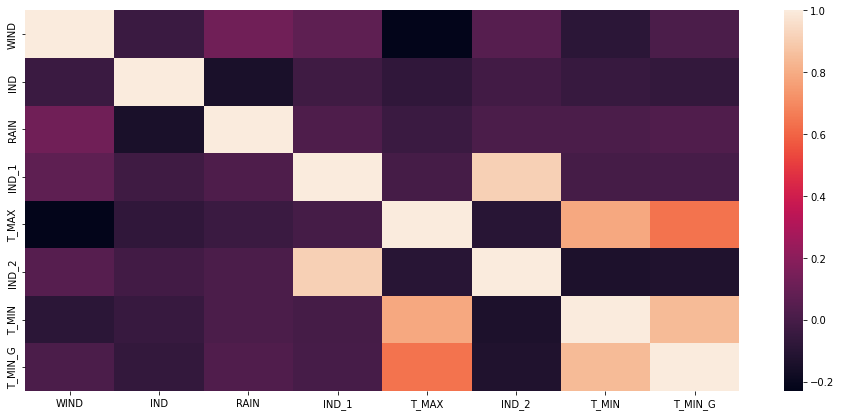

In [30]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr())

<AxesSubplot:>

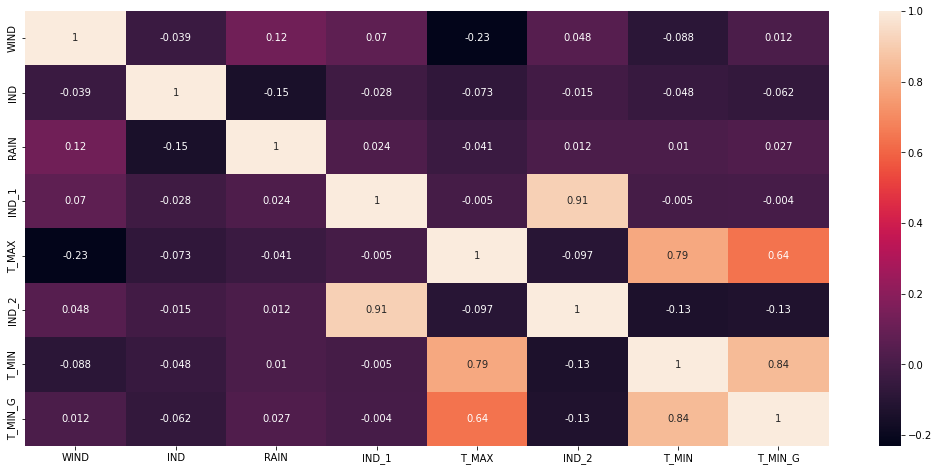

In [31]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

***

##### Before Normalization with (Plotting)

<a class="anchor" id="2.1.1"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


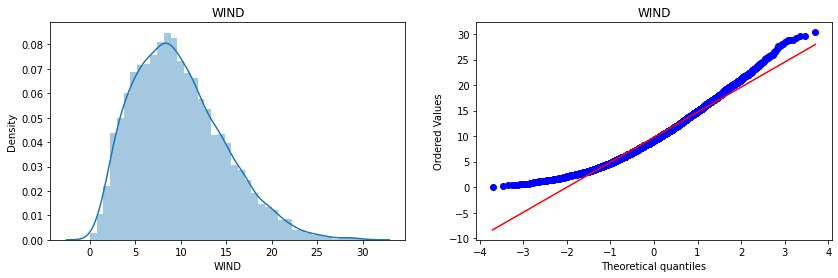

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


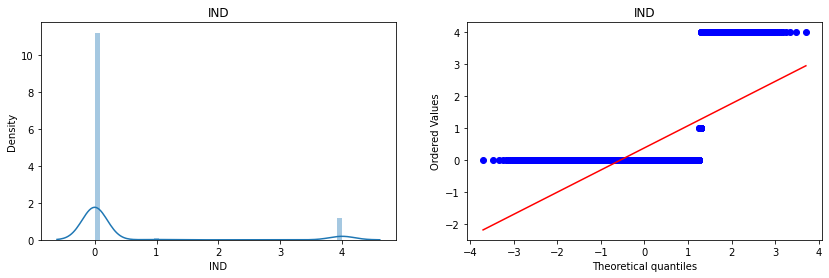

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


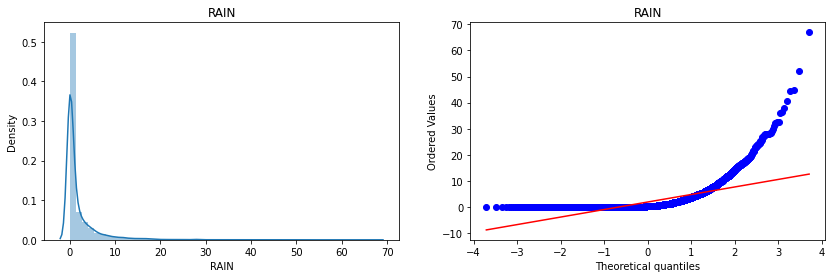

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


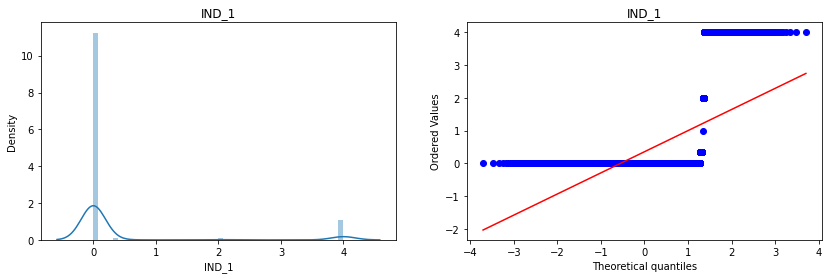

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


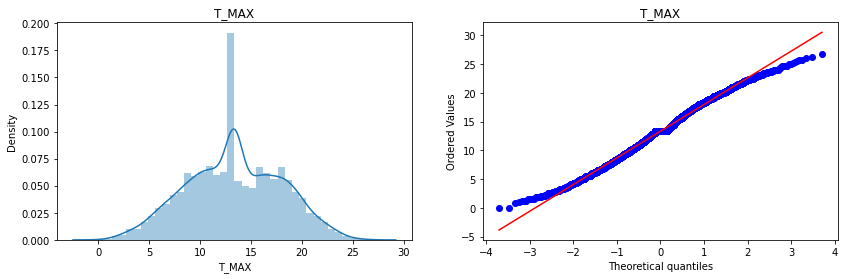

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


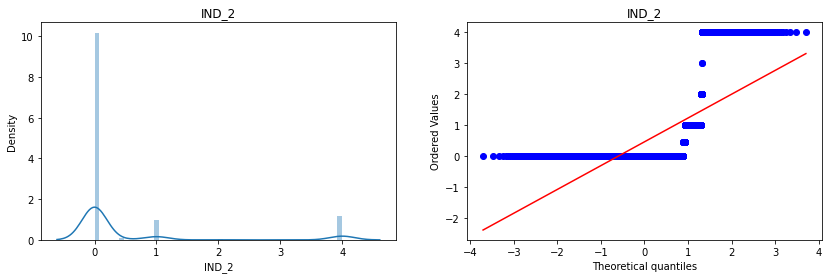

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


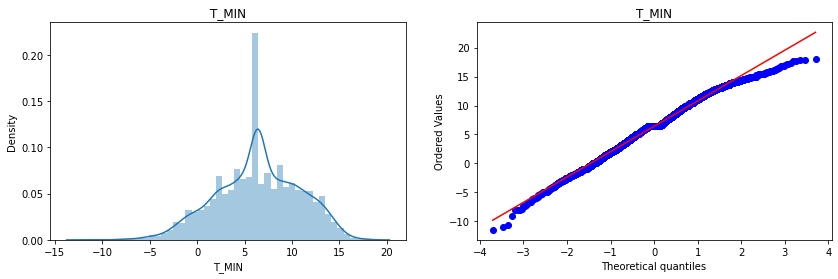

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


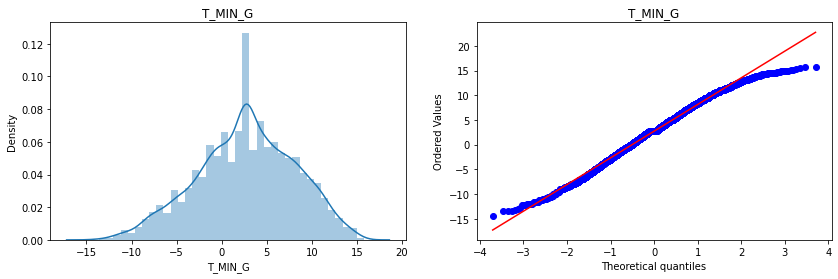

In [32]:
# Plotting the distplots without any transformation

for col in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [33]:
df.columns

Index(['WIND', 'IND', 'RAIN', 'IND_1', 'T_MAX', 'IND_2', 'T_MIN', 'T_MIN_G'], dtype='object')

##### Apply Yeo-Johnson transform

<a class="anchor" id="2.1.2"></a>

In [34]:
features_normalize =[n for n in df.columns if n in ['T_MAX', 'T_MIN', 'T_MIN_G']]
pt = PowerTransformer()
df[features_normalize] = pt.fit_transform(df[features_normalize]+0.00001)

In [35]:
df[features_normalize] = pd.DataFrame(df[features_normalize])
pd.DataFrame({'cols':df[features_normalize].columns,'Yeo_Johnson_lambdas':pt.lambdas_})

,cols,Yeo_Johnson_lambdas
0,T_MAX,0.961163
1,T_MIN,1.051216
2,T_MIN_G,1.043389


##### After Normalization with (Plotting)

<a class="anchor" id="2.1.3"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


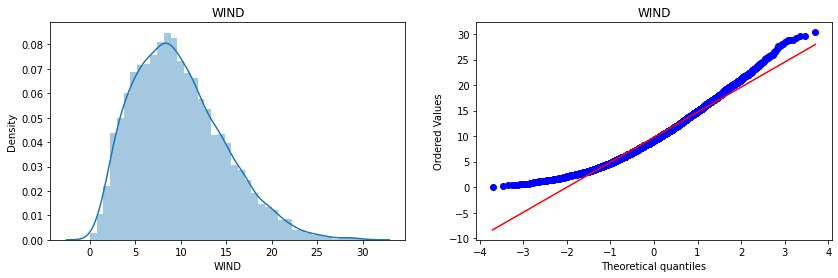

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


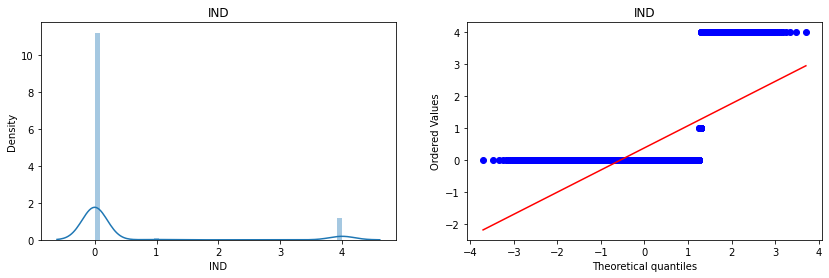

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


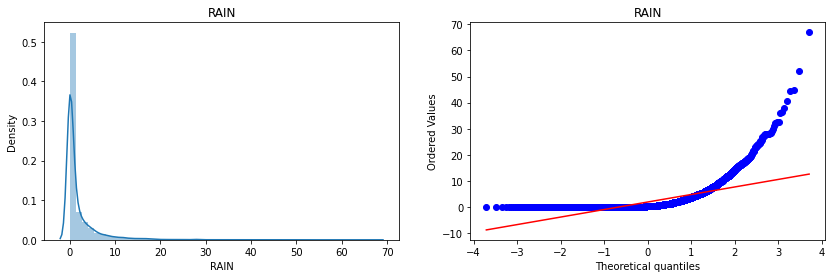

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


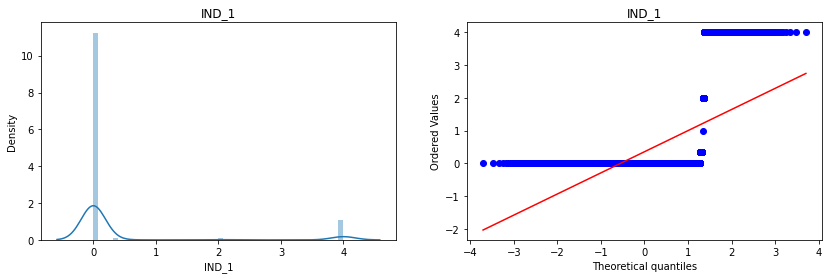

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


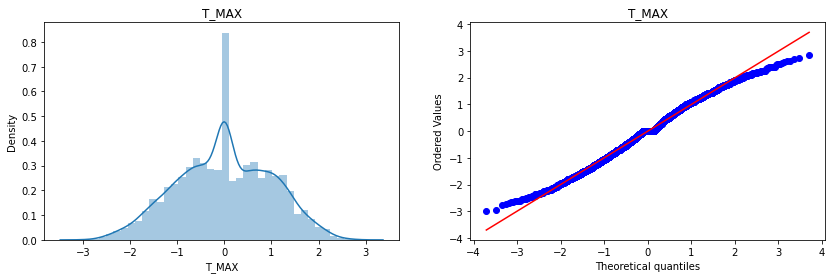

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


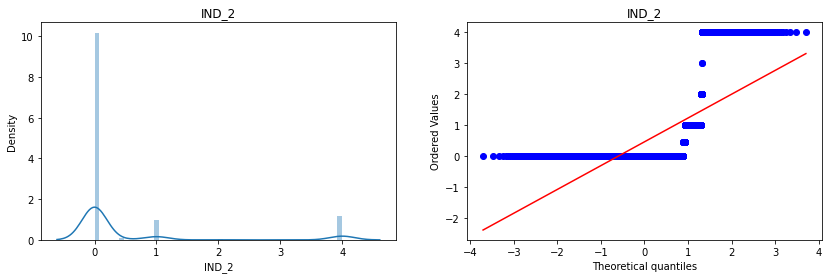

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


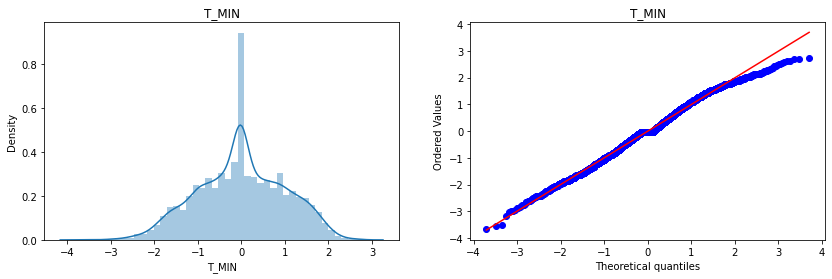

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


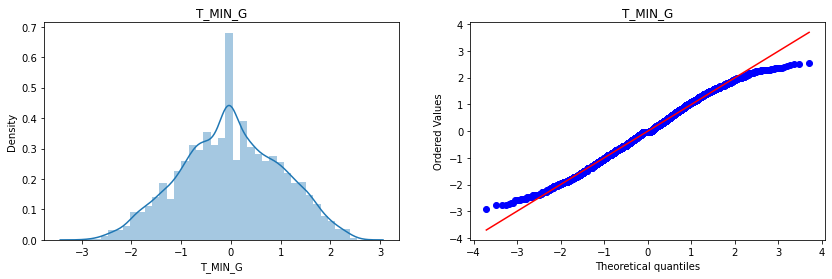

In [36]:
# Plotting the distplots with after transformation

for col in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [37]:
df.columns

Index(['WIND', 'IND', 'RAIN', 'IND_1', 'T_MAX', 'IND_2', 'T_MIN', 'T_MIN_G'], dtype='object')

***

#### <span style="color:blue">**Data Wrangling**</span>

<a class="anchor" id="2.2"></a>

In [38]:
df.isnull().sum()

WIND       0
IND        0
RAIN       0
IND_1      0
T_MAX      0
IND_2      0
T_MIN      0
T_MIN_G    0
dtype: int64

In [39]:
df.shape

(6574, 8)

In [40]:
df.sample(5)

,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
3742,9.29,0,0.4,0.000000,-0.647802,0.000000,-0.114677,0.128508
2441,4.54,0,0.0,0.000000,0.575218,0.000000,-0.068521,-0.942760
2376,5.83,0,0.0,0.000000,1.444660,0.000000,0.913845,0.128508
2002,10.75,0,8.3,0.356364,0.006674,0.464456,-0.019598,-0.035982
4665,6.96,0,11.5,0.000000,-0.280966,0.000000,0.725035,1.240981


##### Feature Scaling

<a class="anchor" id="2.2.1"></a>

In [41]:
features_scale =[i for i in df.columns if i not in ['WIND']]

scaler = MinMaxScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])

In [42]:
df[features_scale].head(1)


,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
0,0.0,0.002985,0.0,0.368911,0.0,0.471136,0.40236


In [43]:
df.head()

,WIND,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
0,13.67,0.0,0.002985,0.0,0.368911,0.00,0.471136,0.402360
1,11.50,0.0,0.076119,0.0,0.282758,0.00,0.488878,0.471346
2,11.25,0.0,0.005970,0.0,0.218482,0.00,0.360536,0.418367
3,8.63,0.0,0.002985,0.0,0.222279,0.00,0.357204,0.333598
4,11.92,0.0,0.155224,0.0,0.282758,0.25,0.296268,0.203329


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

<a class="anchor" id="3"></a>

#### Remove Outliers

<a class="anchor" id="3.1"></a>

In [44]:
outliers = [i for i in df.columns if i not in ['WIND']]

In [45]:
print("Before Cleaning:", df.shape)

Before Cleaning: (6574, 8)


Before Removing Outliers


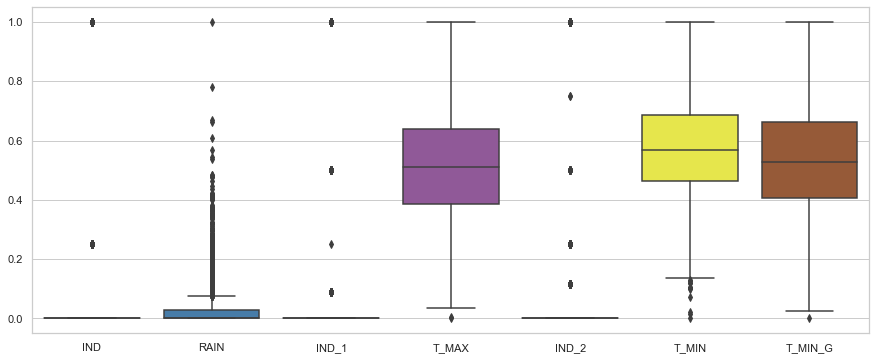

In [46]:
print("Before Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

Before Removing (T_MIN) outliers


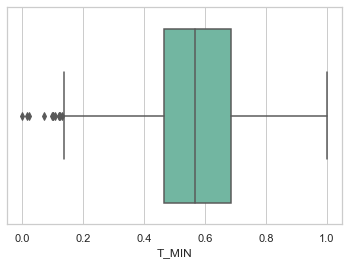

After Removing (T_MIN) outliers


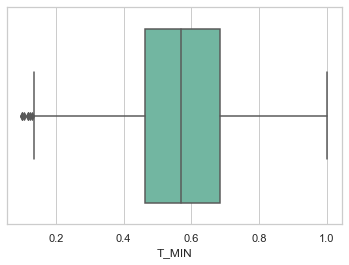

In [47]:
# T_MIN

print("Before Removing (T_MIN) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="T_MIN",
            palette="Set2")
plt.show()            

df = df[df['T_MIN']>0.1] 


print("After Removing (T_MIN) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="T_MIN",
            palette="Set2")
plt.show()            

In [48]:
print("Shape:", df.shape)

Shape: (6569, 8)


***

In [49]:
print("After Cleaning:", df.shape)

After Cleaning: (6569, 8)


After Removing Outliers


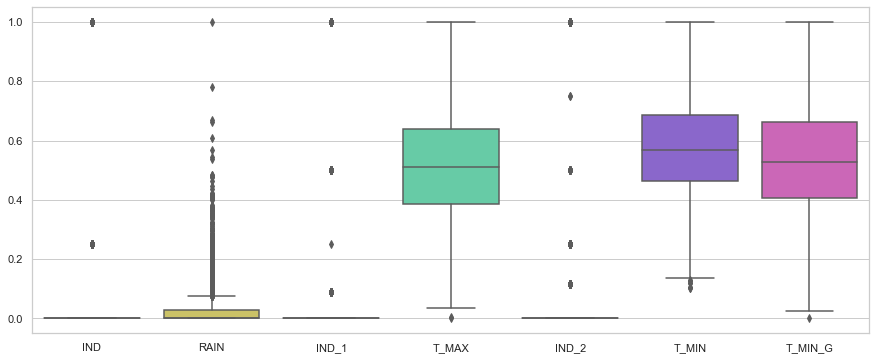

In [50]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="hls")
plt.show()            

***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

<a class="anchor" id="4"></a>

In [51]:
X = df.drop(['WIND'], axis=1)
y = df[['WIND']]

In [52]:
X.sample(5)

,IND,RAIN,IND_1,T_MAX,IND_2,T_MIN,T_MIN_G
2382,0.0,0.007463,0.0,0.845130,0.0,0.856335,0.863561
5906,0.0,0.000000,0.0,0.424691,0.0,0.538999,0.451165
1875,0.0,0.023881,0.0,0.454328,0.0,0.471136,0.533221
4598,0.0,0.067164,0.0,0.681863,0.0,0.662840,0.589327
1179,0.0,0.001493,0.0,0.398696,0.0,0.442955,0.444509


In [53]:
y.sample(5)

,WIND
2139,6.75
4786,13.62
4920,11.54
4868,13.70
1691,10.96


In [54]:
y['WIND'].unique()

array([13.67, 11.5 , 11.25,  8.63, 11.92, 10.67,  9.17, 14.29,  8.04,
       11.42,  7.54, 15.54,  4.63,  3.08,  2.5 ,  9.25, 13.42, 17.83,
        3.71,  3.17,  9.38, 13.7 , 20.38, 14.33, 16.79, 12.25, 22.  ,
       14.5 , 14.88, 10.17, 10.88,  8.5 , 12.54, 13.96, 19.17, 14.21,
       16.5 , 14.37, 11.08, 17.5 , 11.71, 16.08, 15.46,  5.17,  3.42,
        6.17,  9.62,  7.25,  3.75,  8.25, 16.38,  8.17, 13.08, 21.17,
       12.75, 14.75, 10.25, 11.29,  6.21,  5.5 ,  2.83,  3.63,  1.71,
        8.79, 10.34, 17.12,  8.12, 11.54,  2.75, 13.  , 13.17,  7.75,
       15.41,  8.  ,  8.46, 10.75, 13.75,  6.75, 16.62, 14.79, 11.67,
        5.25,  6.  ,  5.  ,  5.33,  8.71,  9.96,  5.21,  5.66,  6.54,
        4.29,  2.46,  2.88,  4.46, 12.96,  9.5 ,  7.46, 10.71,  6.25,
        2.67,  4.04,  5.09, 10.46,  5.96,  9.13, 16.83, 18.21, 18.58,
        3.33,  3.67, 10.04,  5.91,  8.38,  5.83,  5.04,  6.83,  4.71,
        2.42,  3.13,  4.  ,  6.79,  9.33,  4.92,  5.41,  6.58,  9.75,
        7.92, 10.41,

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

<a class="anchor" id="5"></a>

### **Model Building**

<a class="anchor" id="5"></a>

#### <span style="color:yellow">Linear Regression</span>

<a class="anchor" id="5.1"></a>

In [56]:
# LinearRegression

linear_model = DecisionTreeRegressor().fit(X_train, y_train)
linear_model

DecisionTreeRegressor()

In [57]:
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

# LinearRegression
linear_score = np.round(r2_score(y_test, y_pred_linear)*100, 3)
print("Linear Regression:", linear_score)

Linear Regression: -47.094


In [58]:
# Find MAE

linear_mae = mean_absolute_error(y_test, y_pred_linear)*100
print("Linear Regression. (MAE):", linear_mae)

Linear Regression. (MAE): 479.64421613394217


In [59]:
# Find MSE

linear_mse = mean_squared_error(y_test, y_pred_linear)*100
print("Linear Regression. (MSE):", linear_mse)

Linear Regression. (MSE): 3687.9571747632335


In [60]:
# Find RMSE

linear_rmse = sqrt(mean_squared_error(y_test, y_pred_linear))
print("Linear Regression. (RMSE):", linear_rmse)

Linear Regression. (RMSE): 6.0728553208216915


In [61]:
lr_data={'Linear Regression'                   :[linear_score],
         'Linear Regression. (MAE)'            :[linear_mae],
         'Linear Regression. (MSE)'            :[linear_mse],
         'Linear Regression. (RMSE)'           :[linear_rmse]
}

In [62]:
lr_Evaluation = pd.DataFrame(lr_data, index=['Score'])
lr_Evaluation

,Linear Regression,Linear Regression. (MAE),Linear Regression. (MSE),Linear Regression. (RMSE)
Score,-47.094,479.644216,3687.957175,6.072855


#### <span style="color:yellow">Decision Tree Regression</span>

<a class="anchor" id="5.2"></a>

In [63]:
# DecisionTreeRegressor

dt_model = DecisionTreeRegressor().fit(X_train, y_train)
dt_model

DecisionTreeRegressor()

In [64]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(r2_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: -46.864


In [65]:
# Find MAE

dt_mae = mean_absolute_error(y_test, y_pred_dt)*100
print("Decision tree Regressor. (MAE):", dt_mae)

Decision tree Regressor. (MAE): 479.00925925925924


In [66]:
# Find MSE

dt_mse = mean_squared_error(y_test, y_pred_dt)*100
print("Decision tree Regressor. (MSE):", dt_mse)

Decision tree Regressor. (MSE): 3682.1737340394043


In [67]:
# Find RMSE

dt_rmse = sqrt(mean_squared_error(y_test, y_pred_dt))
print("Decision tree Regressor. (RMSE):", dt_rmse)

Decision tree Regressor. (RMSE): 6.06809173796788


In [68]:
dt_data={'Decision tree Regressor'                   :[dt_score],
         'Decision tree Regressor. (MAE)'            :[dt_mae],
         'Decision tree Regressor. (MSE)'            :[dt_mse],
         'Decision tree Regressor. (RMSE)'           :[dt_rmse]
}

In [69]:
dt_Evaluation = pd.DataFrame(dt_data, index=['Score'])
dt_Evaluation

,Decision tree Regressor,Decision tree Regressor. (MAE),Decision tree Regressor. (MSE),Decision tree Regressor. (RMSE)
Score,-46.864,479.009259,3682.173734,6.068092


#### <span style="color:yellow">Random Forest Regression</span>

<a class="anchor" id="5.3"></a>

In [70]:
# RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=1).fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_19000\1965207319.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestRegressor(n_estimators=1).fit(X_train, y_train)


RandomForestRegressor(n_estimators=1)

In [71]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(r2_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: -59.545


In [72]:
# Find MAE

rf_mae = mean_absolute_error(y_test, y_pred_rf)*100
print("Random Forest Regressor. (MAE):", rf_mae)

Random Forest Regressor. (MAE): 492.47387113140536


In [73]:
# Find MSE

rf_mse = mean_squared_error(y_test, y_pred_rf)*100
print("Random Forest Regressor. (MSE):", rf_mse)

Random Forest Regressor. (MSE): 4000.1310762208304


In [74]:
# Find RMSE

rf_rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Regressor. (RMSE):", rf_rmse)

Random Forest Regressor. (RMSE): 6.324658944339078


In [75]:
rf_data={'Random Forest Regressor'                   :[rf_score],
         'Random Forest Regressor. (MAE)'            :[rf_mae],
         'Random Forest Regressor. (MSE)'            :[rf_mse],
         'Random Forest Regressor. (RMSE)'           :[rf_rmse]
}

In [76]:
rf_Evaluation = pd.DataFrame(rf_data, index=['Score'])
rf_Evaluation

,Random Forest Regressor,Random Forest Regressor. (MAE),Random Forest Regressor. (MSE),Random Forest Regressor. (RMSE)
Score,-59.545,492.473871,4000.131076,6.324659


#### <span style="color:yellow">K-Nearest Neighbors Regressor</span>

<a class="anchor" id="5.4"></a>

In [77]:
# KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [78]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(r2_score(y_test, y_pred_knn)*100, 3)
print("K-Nearest Neighbors:", knn_score)

K-Nearest Neighbors: 1.908


In [79]:
# Find MAE

knn_mae = mean_absolute_error(y_test, y_pred_knn)*100
print("K-Nearest Neighbors. (MAE):", knn_mae)

K-Nearest Neighbors. (MAE): 391.72404870624047


In [80]:
# Find MSE

knn_mse = mean_squared_error(y_test, y_pred_knn)*100
print("K-Nearest Neighbors. (MSE):", knn_mse)

K-Nearest Neighbors. (MSE): 2459.3638152207


In [81]:
# Find RMSE

knn_rmse = sqrt(mean_squared_error(y_test, y_pred_knn))
print("K-Nearest Neighbors. (RMSE):", knn_rmse)

K-Nearest Neighbors. (RMSE): 4.95919732942812


In [82]:
knn_data={'K-Nearest Neighbors'                   :[knn_score],
          'K-Nearest Neighbors. (MAE)'            :[knn_mae],
          'K-Nearest Neighbors. (MSE)'            :[knn_mse],
          'K-Nearest Neighbors. (RMSE)'           :[knn_rmse]
}

In [83]:
knn_Evaluation = pd.DataFrame(knn_data, index=['Score'])
knn_Evaluation

,K-Nearest Neighbors,K-Nearest Neighbors. (MAE),K-Nearest Neighbors. (MSE),K-Nearest Neighbors. (RMSE)
Score,1.908,391.724049,2459.363815,4.959197


#### <span style="color:yellow">Support Vector Machine</span>

<a class="anchor" id="5.5"></a>

In [84]:
# SVM

svm_model = svm.SVR(kernel= 'linear').fit(X_train, y_train)
svm_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [85]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

# SVM 
svm_score = np.round(r2_score(y_test, y_pred_svm)*100, 3)
print("Support Vector Machine:", svm_score)

Support Vector Machine: 7.315


In [86]:
# Find MAE

svm_mae = mean_absolute_error(y_test, y_pred_svm)*100
print("Support Vector Machine. (MAE):", svm_mae)

Support Vector Machine. (MAE): 380.601125610857


In [87]:
# Find MSE

svm_mse = mean_squared_error(y_test, y_pred_svm)*100
print("Support Vector Machine. (MSE):", svm_mse)

Support Vector Machine. (MSE): 2323.8160230935023


In [88]:
# Find RMSE

svm_rmse = sqrt(mean_squared_error(y_test, y_pred_svm))
print("Support Vector Machine. (RMSE):", svm_rmse)

Support Vector Machine. (RMSE): 4.820597497295851


In [89]:
svm_data={'Support Vector Machine'                   :[svm_score],
          'Support Vector Machine. (MAE)'            :[svm_mae],
          'Support Vector Machine. (MSE)'            :[svm_mse],
          'Support Vector Machine. (RMSE)'           :[svm_rmse]
}

In [90]:
svm_Evaluation = pd.DataFrame(svm_data, index=['Score'])
svm_Evaluation

,Support Vector Machine,Support Vector Machine. (MAE),Support Vector Machine. (MSE),Support Vector Machine. (RMSE)
Score,7.315,380.601126,2323.816023,4.820597


***

### <span style="color:cyan">Step: 06</span>: Evaluate or Compare Models Accuracy

<a class="anchor" id="6"></a>

In [91]:
data={'Linear Regression'                  :[linear_score],
      'Decision tree Regressor'            :[dt_score],
      'Random Forest Regressor'            :[rf_score],
      'KNN Regressor'                      :[knn_score],
      'SVM Regressor'                      :[svm_score]
}

In [92]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Linear Regression,Decision tree Regressor,Random Forest Regressor,KNN Regressor,SVM Regressor
Score,-47.094,-46.864,-59.545,1.908,7.315


***

#### <span style="color:magenta">**Apply Cross-Validation**</span>

<a class="anchor" id="7"></a>

In [93]:
# svm_validate = np.round(cross_val_score(svm_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
# print("After cross validation of SVM:", svm_validate)

#### <span style="color:green">**Best Technique**</span>: <span style="color:yellow">**Support Vector Machine**</span>

<a class="anchor" id="8"></a>

In [94]:
best_data={'Support Vector Machine'                   :[svm_score],
           'Support Vector Machine. (MAE)'            :[svm_mae],
           'Support Vector Machine. (MSE)'            :[svm_mse],
           'Support Vector Machine. (RMSE)'           :[svm_rmse]
}

In [95]:
best_Evaluation = pd.DataFrame(best_data, index=['Score'])
best_Evaluation

,Support Vector Machine,Support Vector Machine. (MAE),Support Vector Machine. (MSE),Support Vector Machine. (RMSE)
Score,7.315,380.601126,2323.816023,4.820597


***

***

***